# Introduction

[On February 20, 2023, the Twitter hastag "Civil War" was trending, as Twitter users reacted to a tweet from Georgia Republican Congresswoman Marjorie Taylor Greene, which called for a "national divorce."](https://www.seattletimes.com/nation-world/nation-politics/civil-war-trends-after-marjorie-taylor-greene-tweets-asks-for-national-divorce/)

Upon hearing this in passing, I assumed this meant that the tweets were in agreement with Greene's idea of "national divorce"  and in support of civil war. I had this assumption because of the timing of this tweet. It occurred not too long [after the former President Donald Trump's Mar-a-lago home was raided by the Federal Bureau of Investigation (FBI)](https://www.nytimes.com/2022/10/05/us/politics/civil-war-social-media-trump.html#:~:text=Posts%20on%20Twitter%20that%20mentioned,Trump's%20social%20media%20platform.) and [after a Trump supporter from Iowa stated that they felt civil war was coming](https://www.forbes.com/sites/petersuciu/2021/10/10/civil-war-trending-on-twitter-after-comment-made-by-trump-supporter/?sh=6af443b71853), two events that also led to an increase of tweets about civil war. 

However, I wanted to gain a better understanding of the context of these tweets and see if my assumptions were true. To do so, I scraped and analyzed over 3,000 tweets containing the phrase "Civil War" and mentioning Greene's Twitter handle. All tweets were written between February 20-26, 2023.

# Importing the Libraries We Will Need

In [2]:
# Selenium Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common import TimeoutException

# Other Imports
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

# Preliminaries

## Utility Functions

In [2]:
# Wait for a random time between 4 and 8 seocnds
def r():
    time.sleep(np.random.uniform(4, 8))

In [3]:
def write(box, text, enter = True):
    for char in text:
        box.send_keys(char)
        time.sleep(np.random.uniform(0.1, 0.5))
    if enter:
        box.send_keys(Keys.ENTER)

## Prepping the Scrapper

In [5]:
# Setting User Agent Header as well as other Request Headers
# This can be retrieved from http://httpbin.org/anything <-
headers = {
    # Headers here
}

Create a function that creates a ModHeader URL.

In [415]:
def create_header_url(headers):
    prefix = "https://webdriver.modheader.com/add?"
    for name in headers:
        prefix += name + "=" + headers[name] +"&"
    # Remove the final &
    prefix = prefix[:-1]
    # Replace spaces with %20
    prefix = prefix.replace(" ", "%20")
    return prefix

Add ModHeader as an extension

In [11]:
# More info: https://modheader.com/docs/advanced/selenium-webdriver
op = webdriver.ChromeOptions()
op.add_extension("modheader.crx")

In [12]:
# Path to Chromedriver
CHROME = "chromedriver.exe"

## Tests

In [13]:
# Are the headers working?
s = Service(executable_path = CHROME)
browser = webdriver.Chrome(service = s, options = op)
browser.set_window_size(1750, 1000)
browser.get(create_header_url(headers))
r()
browser.get("https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending")
time.sleep(10)
browser.close()

## Twitter Info

In [14]:
# Input user information <-
email = # email here
user = # username here
password = # password here

# ---------------------------

hashtag = "#civilwar"
phrase = "Civil War"

In [100]:
"""
sdm: start date month      sdd: start date day      sdy: start date year
edm: end date month        edd: end date day        edy: end date year
"""
curr_year = 2023
sdm = 2
sdd = 20
sdy = 2023

start_date = f'{sdy}-{sdm:02}-{sdd:02}'
# Note that the end date is EXCLUSIVE!
edm = 2
edd = 27
edy = 2023
    
end_date  = f'{edy}-{edm:02}-{edd-1:02}'
infinite = True # Look for ALL tweet matching description
min_tweets = 10  # Minimum number of tweets to extract

# Scrapping the data

You can manually scrap the data using the code below. Alternatively, you can load the xlsx workbook, which already contains the scraped tweets.

In [16]:
# Go on Google and open Twitter
## Load Headers and Navigate to Google
s = Service(executable_path = CHROME)
browser = webdriver.Chrome(service = s, options = op)
browser.set_window_size(1750, 1000)
browser.get(create_header_url(headers))
r()
browser.get("https://google.com")

## Find Google Search Box
## Note: All XPaths varibales end in "xp"
google_search_box_xp = '//*[@id="APjFqb"]'
google_search_box = browser.find_element(By.XPATH, google_search_box_xp)

## Type Twitter
write(google_search_box, "twitter")
r()

## Click the First link
twitter_link_xp = '//*[@id="rso"]/div[1]/div/div/div/div/div/div/div/div[1]/div/span/a'
twitter_link = browser.find_element(By.XPATH, twitter_link_xp)
twitter_link.click()
r()

In [17]:
# Login
## Press Login Button
login_button_xp = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div[1]/div[1]/div/div[3]/div[5]/a'
login_button = browser.find_element(By.XPATH, login_button_xp)
login_button.click()
r()

In [18]:
## Add Username
username_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input'
username_box = browser.find_element(By.XPATH, username_xp)
write(username_box, user)
r()

In [19]:
## Add Password
password_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input'
password_box = browser.find_element(By.XPATH, password_xp)
write(password_box, password)
r()

Exit any popup messages, if necessary (i.e. messages asking you to boost your account security).

In [84]:
input("Exit any popup messages, if necessary (i.e. messages asking you to boost your account security).\nPress enter when ready to proceed.")

Exit any popup messages, if necessary (i.e. messages asking you to boost your account security).
Press Enter when read to proceed.


''

In [20]:
# Navigate to Search Box and Search for Civil War
search_xp = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/label/div[2]/div/input'
search_box = browser.find_element(By.XPATH, search_xp)
write(search_box, hashtag)
r()

In [58]:
# Include Advanced Settings
## Press three dots
three_dots_xp = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[1]/div/div/div/div/div[3]/div/div'
three_dots = browser.find_element(By.XPATH, three_dots_xp)
three_dots.click()
r()

In [59]:
## Press Advanced Search
adv_search_xp = '//*[@id="layers"]/div[2]/div/div/div/div[2]/div/div[3]/div/div/div/a[2]/div[2]/div/span'
adv_search = browser.find_element(By.XPATH, adv_search_xp)
adv_search.click()
r()

In [60]:
## Add Phrase
phrase_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[2]/div/div[2]/div[1]/div/label/div/div[2]/div/input'
phrase_box = browser.find_element(By.XPATH, phrase_xp)
write(phrase_box, "civil war", False)
r()

In [61]:
## Specify Language
language_box = browser.find_element(By.TAG_NAME, "select")
language_box.send_keys("E")
r()

In [62]:
## Filter only Tweets that MENTION to MTG
reply_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[2]/div/div[5]/div[3]/div/label/div/div[2]/div/input'
reply_box = browser.find_element(By.XPATH, reply_xp)
write(reply_box, "@mtgreenee", False)
r()

In [63]:
## Select Start dates and end dates
date_selector_codes = {"sdm": (2, sdm),
                       "sdd": (3, sdd),
                       "sdy": (4, sdy),
                       "edm": (5, edm),
                       "edd": (6, edd),
                       "edy": (7, edy)}

#### We need to calculate how many times to press the down arrow key to select
#### the correct option.
#### For all but the years, it is simply pressing the down arrow x times,
#### where x is the month or day number
#### For the years, x = curr_year - selected_year + 1

for name, [ID, value] in date_selector_codes.items():
    drop_down = browser.find_elements(By.TAG_NAME, 'select')[ID - 1]
    drop_down.click()
    if name not in ("sdy", "edy"):
        for i in range(value):
            drop_down.send_keys(Keys.ARROW_DOWN)
            time.sleep(0.2)
    else:
        for i in range(curr_year - value + 1):
            drop_down.send_keys(Keys.ARROW_DOWN)
            time.sleep(0.2)
            
drop_down.send_keys(Keys.ENTER)
r()

In [64]:
##  Press the Search Button
search_button_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[1]/div/div/div/div/div/div[3]/div/div/span/span'
search_button = browser.find_element(By.XPATH, search_button_xp)
search_button.click()
r()

In [65]:
## Move to the Latest Tab
latest_xpath = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[2]/nav/div/div[2]/div/div[2]/a/div/div/span'
latest_tab = browser.find_element(By.XPATH, latest_xpath)
latest_tab.click()
r()

In [ ]:
# Scrap Tweets
## Twitterhandle is only used to remove duplicate tweets
## the twitterhandle columns is dropped afterwards.

tweets = pd.DataFrame(columns = ['twitterhandle', 'date', 'tweet'])
row_id = 0

In [71]:
row_id = len(tweets)

prev_page_height = 0
curr_page_height = browser.execute_script("return window.pageYOffset + window.innerHeight")

while (infinite and prev_page_height != curr_page_height) or            \
      (not infinite and tweets.shape[0] < min_tweets and prev_page_height != curr_page_height):
    ## Wait for the first tweet on the page to show up
    r()
    
    ## Extract HTML and parse through it with BS
    soup = BeautifulSoup(browser.page_source, 'lxml')
    
    ### Get twitterhandles
    temp = soup.find_all(name = 'a', class_ = "css-4rbku5 css-18t94o4 css-1dbjc4n r-1loqt21 r-1wbh5a2 r-dnmrzs r-1ny4l3l",
                         attrs = {"tabindex": "-1"})
    handles = [x.div.span.text    for x in temp]
    
    ### Get the Dates
    temp = soup.find_all(name = 'time')
    dates = [x["datetime"][ : 10]   for x in temp]
    
    ### Get the tweets
    temp = soup.find_all(name = 'article')
    available_tweets = []
    for x in temp:
        try:
            available_tweets.append(x.find(name = "div", attrs={"data-testid": "tweetText"}).text)
        except AttributeError:
            print("Warning - Tweet without .text attribute")
 

    ### Zip up information
    rows = zip(handles, dates, available_tweets)
    temp_df = pd.DataFrame.from_records(rows, columns =['twitterhandle', 'date', 'tweet'])
    temp_df.drop_duplicates(inplace = True)

    tweets = pd.concat([tweets, temp_df], axis = 0, ignore_index= True)
    ### Update page height 
    prev_page_height = curr_page_height
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    
    
    curr_page_height = browser.execute_script("return window.pageYOffset + window.innerHeight")
    
    ### Chill out for a second
    time.sleep(np.random.uniform(30, 50))
    
    
# Remove any duplicates
tweets.drop_duplicates(inplace = True, ignore_index = True)

In [75]:
browser.close()

Let's clean up the data frame.

In [86]:
# Make sure that the date columns is date
tweets["date"] = tweets["date"].astype("datetime64")

# Removing the Twitter Handle, now that we've removed duplicates
tweets.drop(["twitterhandle"], axis = 1, inplace = True)

# Remove any tweets are not in the date range but somehow got here. Sort by Date.
tweets.sort_values("date", inplace = True)
indices_to_drop = tweets.index[~ np.isin(tweets["date"], pd.date_range(start_date, end_date))]
tweets.drop(indices_to_drop, inplace = True)
tweets.reset_index(inplace = True, drop = True)

Here is the final product.

In [5]:
save = False
load = False

if save:
    tweets.to_excel("tweets.xlsx", index= False)
if load:
    tweets = pd.read_excel("tweets.xlsx")

# Preprocessing the Text

In [6]:
# Put all tweets in a list.
tweets_list = []
for tweet in tweets["tweet"]:
    tweets_list.append(tweet)

First, let's make all tweets lowercase.

In [7]:
tweets_list = [x.lower() for x in tweets_list]

In [8]:
# Tokenize tweets
import spacy
from spacy.tokenizer import _get_regex_pattern
import re
nlp = spacy.load('en_core_web_sm')

# Add new regex patterns for token detection
# Adapted from : https://stackoverflow.com/questions/43388476/how-could-spacy-tokenize-hashtag-as-a-whole
re_token_match = _get_regex_pattern(nlp.Defaults.token_match)
re_token_match = fr"({re_token_match}|#\w+|\w+['-]\w+|\d+%)"
nlp.tokenizer.token_match = re.compile(re_token_match).match

tweets_list = [nlp(x)    for x in tweets_list]

In [9]:
# Find the Lemma of each token
for ind, doc in enumerate(tweets_list):
    tweets_list[ind] = [nlp.tokenizer(token.lemma_)[0]    for token in doc]

In [10]:
# Remove spaces and punct, stop words, and any additional words to ignore
from spacy.lang.en import stop_words
ignore = []
for i in range(len(tweets_list)):
    tweet = tweets_list[i]
    tweets_list[i] = [token   for token in tweet  if not token.is_punct and not token.is_space and not token.is_stop 
                                                       and not token.text in ignore]

In [11]:
# Save all 1-grams
onegrams = []
for x in tweets_list:
    onegrams += x
    
onegrams_text = [x.text  for x in onegrams]

In [12]:
#2-grams
from nltk import ngrams
twograms = []
for x in tweets_list:
    twograms += list(ngrams(x, 2))

# Results

Though the 1grams do not give us much insight, here are the 1grams at a glance.

In [13]:
from collections import Counter
onegrams_freq = Counter(dict(sorted(Counter(onegrams_text).items(), key = lambda item: item[1], reverse = True)))

In [14]:
import matplotlib.pyplot as plt
def plot_grams(counter, start, end, title, save = False):
    freqs = []
    words = []
    i = 0
    for gram, freq in counter.items():
        i += 1
        if i < start :
            continue
        if i > end:
            break
        else:
            words.append(gram)
            freqs.append(freq)

    fig, ax = plt.subplots(figsize = (12, 7), dpi = 300)
    ax.bar(range(0, len(freqs)), freqs)
    ax.set_xticks(range(0, len(freqs)), words, rotation = "vertical", fontsize = 10)
    ax.set_ylabel("Frequency", labelpad = 10)
    ax.set_title(title)
    
    if save:
        fig.savefig("fig", bbox_inches = "tight")
    plt.show()

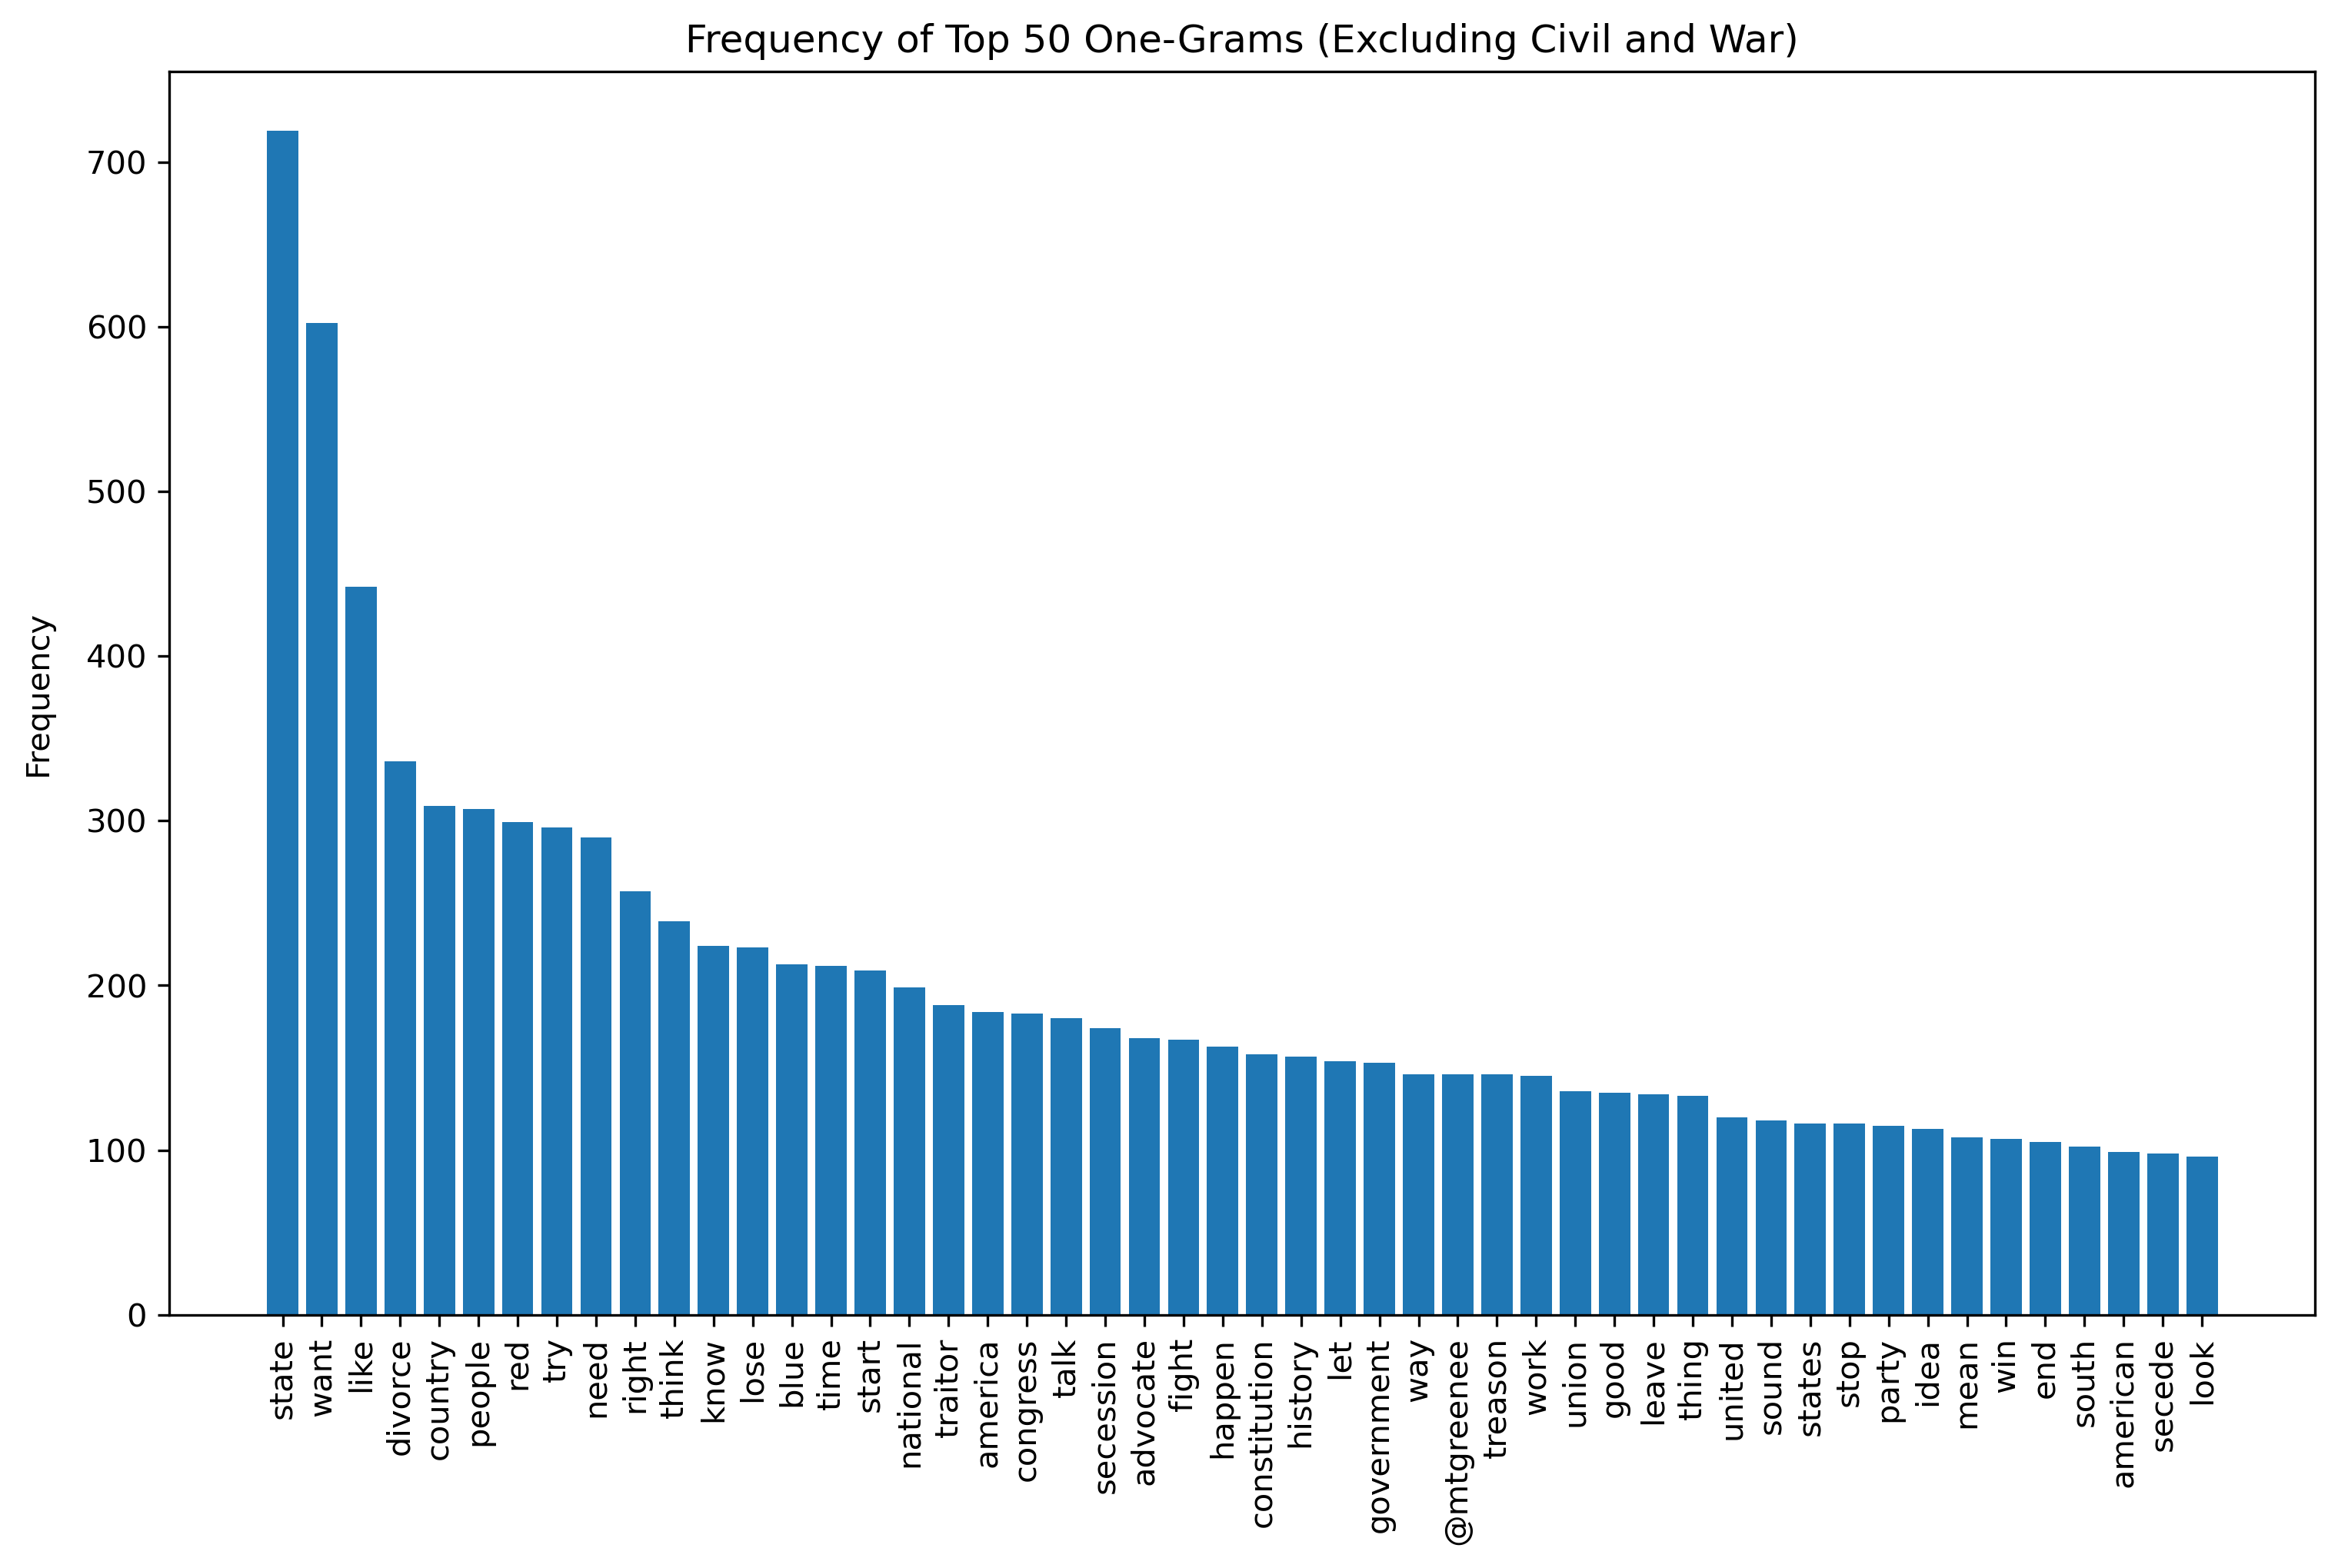

In [15]:
plot_grams(onegrams_freq, 3, 52, "Frequency of Top 50 One-Grams (Excluding Civil and War)")

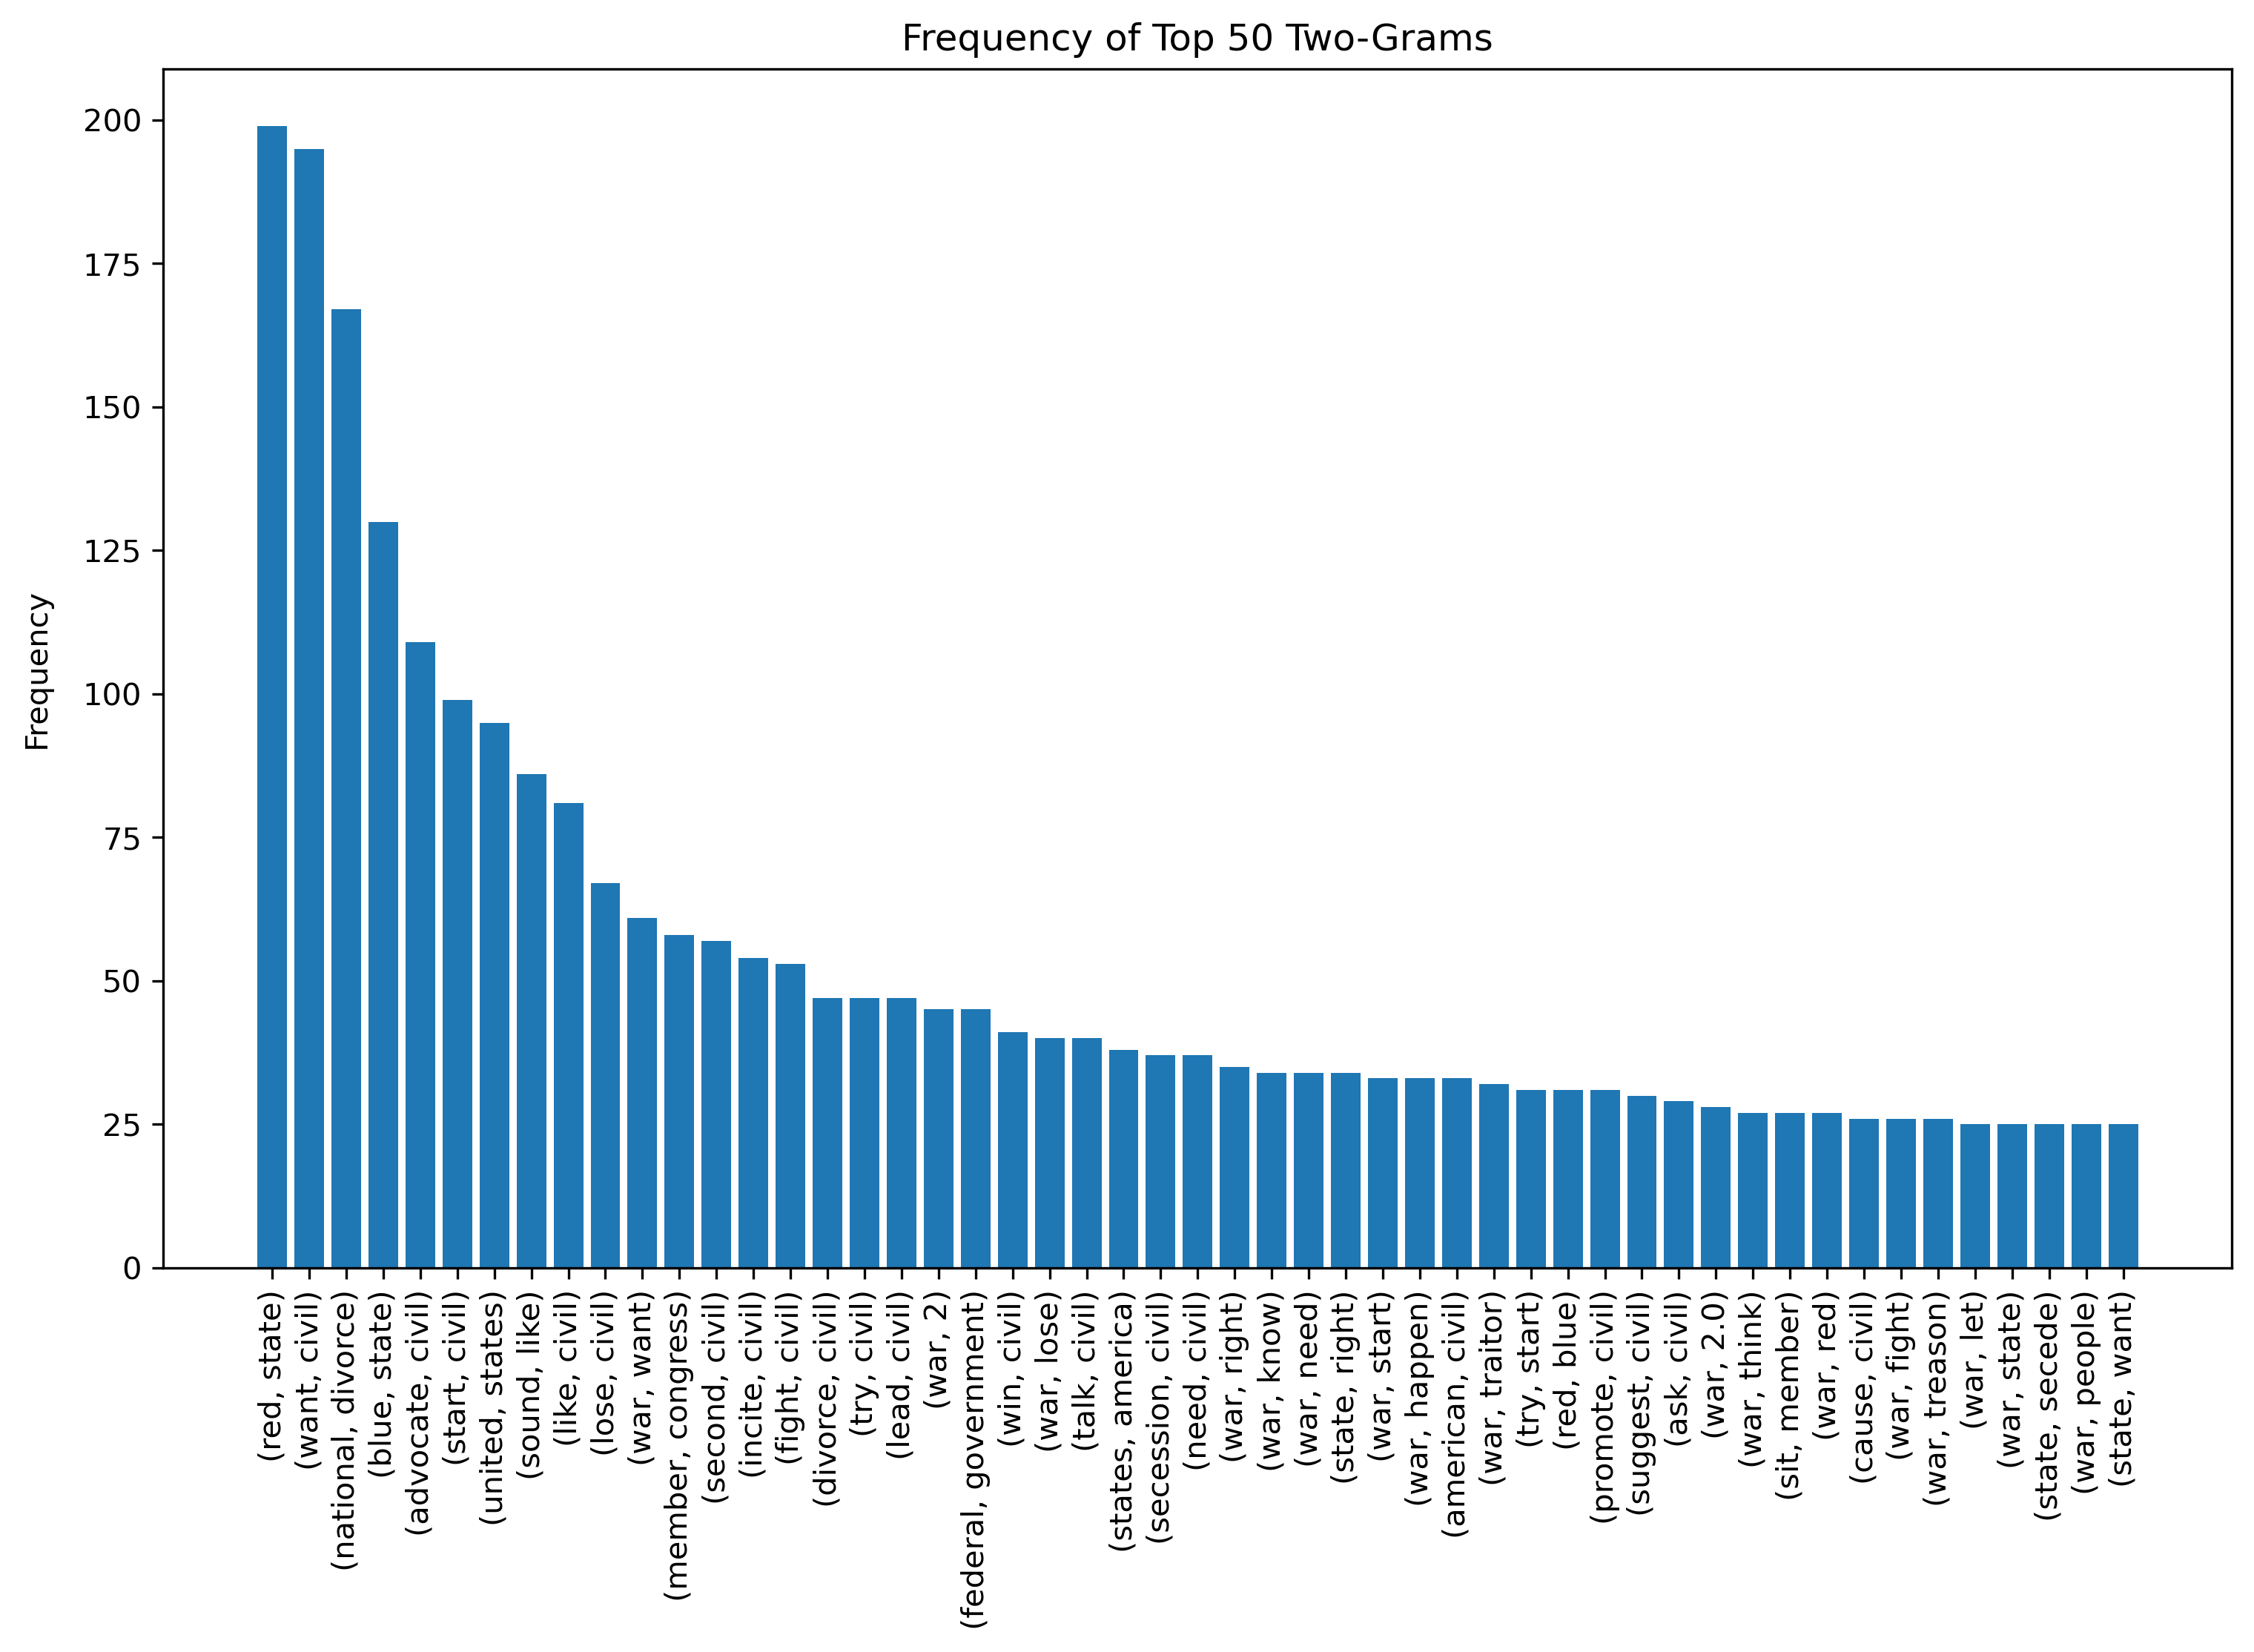

In [16]:
twograms_freq = Counter(dict(sorted(Counter([str(twogram)  for twogram in twograms]).items(), key = lambda item: item[1], reverse = True)))
plot_grams(twograms_freq, 2, 52, "Frequency of Top 50 Two-Grams")

Among the most common one-grams and two-grams are the words "traitor", "treasonous", "incite civil", and "promote civil".
Typically, users were against the idea of a national divorce, likening the idea to civil war.

Below shows 20 tweets that contain phrases similar to any of these following phrases
* advocate civil
* promote civil
* suggest civil
* sound like

In [17]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', x.shape[1])
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option("display.max_colwidth")

In [18]:
def find_tweets_with_gram(gram_list, top_n = None):
    indices = []
    for ind, tweet_tokens in enumerate(tweets_list):

        temp = [tweet.text   for tweet in tweet_tokens]
        string = " ".join(temp)
        for gram in gram_list:
            if gram in string:
                indices.append(ind)
    
    indices = np.unique(indices)
    if top_n is None:
        df = tweets.iloc[indices, [1]].copy()
    else:
        df = tweets.iloc[indices[:top_n], [1]].copy()
        
    df["tweet"] = df["tweet"].str.replace("\n", " ")

        
    print_full(df)
    
    
find_tweets_with_gram(['advocate civil', "promote civil", "suggest civil", "sound like"], 20)

,tweet
4,So you're advocating civil war. @FBI please arrest this woman.
17,Advocating for another civil war. Didn’t work out the first time.
21,So you’re basically advocating for civil war.
27,So your advocating for a civil war? Interesting
37,Are you suggesting civil war? That will be fine. How will Georgia fit? Has your pea brain put any thought into this?
47,"Basically, you are advocating for a civil war. And the red states can compensate the blue states for all the money we spent on them."
50,You are litterally advocating for a Civil War..This is what happens when you vote stupid people with extremist views into power
58,sounds like Civil War 2.0 you have violated your oath of office and are a self-declared traitor and racist.
60,So you’re advocating for another Civil War???
62,"Sort of sounds like you're advocating for a civil war? Possibly a revolution. Maggie, are you threatening the safety and security of the United States because you have the second most fragile ego in the world?"


Some argued that the tweet was "treasonous" and violated the 14th Amendment.

In [19]:
find_tweets_with_gram(['treasonous', '14th amendment'], 10)

,tweet
74,"This has been tried already it was called the Civil War you lying seditious treasonous moron, you want to destroy America not make it great a house divided cannot stand"
80,This is treasonous talk you speak of. Your invoking a civil war.
205,"“National divorce”? You mean treason, civil war? There’s nothing more treasonous than this tweet."
232,This was called The Civil War. The Union won. You should be removed from office for advocating another Civil War under the 14th amendment section 3.
250,"Nobody who believes this deserves to serve in the UNITED STATES Congress, per the 14th Amendment. This is a dog whistle encouraging civil war, which is a crime, and the @DOJPH and @fbi need to pay attention."
288,"Starting and losing a civil war, 158 years ago, has CONSEQUENCES. You had 158 years to learn to stop being a TREASONOUS CONFEDERATE. Tomorrow would be a good day to start that change. Including for those people you talk to."
311,"Good stuff, inciting civil war essentially. You’re a disgrace. Don’t let me see one fucking tweet about “deMOcrAts DiViDiNg AmeriCA” you treasonous bitch"
324,We fought a civil war over this and treasonous separatists lost. Exactly what is your proposal now? Or is this just your latest bid for attention and donations? You should indicate which traitorous crap you want us to take seriously.
354,Did you just say that we should do something that could lead the Civil War and It also very treasonous
369,So you are proposing red states secede from the country? Isn't that promoting a civil war? Isn't that treasonous?


I noticed that `("war", "2.0")` was a one of the 2-grams that came up, and decided to take a look at 20 tweets that contained this phrase.

In [20]:
find_tweets_with_gram(["war 2.0"], 20)

,tweet
38,Isn’t this advocating the end to the united states of America and therefore should be considered treason? Let’s just fast forward to Civil War 2.0. See how many die this time. All bc of some stupid code word called “woke”. Morons should not be in congress.
58,sounds like Civil War 2.0 you have violated your oath of office and are a self-declared traitor and racist.
71,Civil War 2.0 is the only answer!!
399,So you’re now openly asking for Civil War 2.0?
505,"Secession..states rights....sheet some y'all been worried bout WW3 , but are okay with kicking off Civil War 2.0...."
529,* Civil war 2.0 * Let’s do it.
565,Isn't this just Civil War 2.0 or did I miss something?
868,US Civil War 2.0 ?
919,The most treasonous member of our government wants to crowdfund her Civil War 2.0. I thought we agreed not to reelect traitors?
924,"When you lose civil war 2.0, you don’t get to go home this time…you go to prison. All your farms and ranches get taken over by minority owners and you are ordered to work there at a prisoner pay rate."


The following tweet "Yes! Why don’t u Muricans just have ur inevitable Civil War 2.0 already and get it over with", made me wonder how often "war inevitable" was used and in what context.

In [21]:
print(twograms_freq['(war, inevitable)'])

4


In [22]:
find_tweets_with_gram(['war inevitable'])

,tweet
705,"1. Putin got tump elected. 2. Extorting Ukraine 3. Incited an Insurrection. Biden Being an enemy to the American People is just True And if the Federal Government Continues to overstep on things like the 2nd Amendment, A Civil War is Inevitable."
2078,"Honest question Ross With the deep divisions in this country& its deeper than red v blue states, how much longer can this country stand without bloodshed? Sadly, I think a civil war is inevitable So if choosing between the 2 I’d prefer an amicable divorce"
2855,A civil war is inevitable unless this happens
3006,Exactly what rights do you think are not being upheld? And just to be clear… You believe a civil war is inevitable? And don’t try to say “No. A peaceful separation.” Because that is NOT going to happen. Zero percent chance that happens. Zero.


Thus, out of those likened the idea of "national divorce" to civil war, some found the idea to be "treasonous" and dangerous and others found the idea unavoidable.

Users were quite divided as to how Greene's tweet should be interpreted. While some saw it as a call for civil war, others argued that a national divorce did not necessarily have to end in war.

In [23]:
find_tweets_with_gram(['lead civil'], 5)

,tweet
157,@DOJPH she was part of one insurrection and now is trying to lead us to civil war - openly. Seriously can you people not see this. @POTUS - treason treason treason. This is ok apparently? This is dangerous and extreme and we wonder why we look like clowns internationally.
330,Finally one of the loudest maga nuts is calling for civil war. Let's get this started then. I mean that's what led to the the last civil war so it's the only outcome. But I'm not sure how the welfare republican states will fund themselves without all that money from blue states.
348,That would be like the secession leading to the Civil War. That’s criminal. That is traitorous. Does “everyone” include Q or just you and the screaming voices?
354,Did you just say that we should do something that could lead the Civil War and It also very treasonous
590,"Basically calling for another cessation, like the one that lead to the Civil War on Twitter is probably one of the most unamerican things I’ve seen"


In [24]:
find_tweets_with_gram(['peaceful'], 5)

,tweet
103,A peaceful divorce doesn't need to end in civil war.
107,"That war was over 150 years ago. Times change. There isn't any great reason we can't have a peaceful divorce. If it came to a peaceful divorce, or a true civil war over the centralized power of the federal government, you would pick a civil war?"
125,No civil war is necessary. Americans should be well versed on migration after watching 5 million people easily migrate into America with ease. They set the example of how easy it will be to partition America peacefully just by packing up and moving. Immigrants set the standard.
415,"What you are saying requires violence. Most of us calling for a national divorce want it done peacefully. Which is fully possible and legal. And a peaceful breakup is far more preferable to a devastating civil war, which many on both sides seem to want without understanding what…"
454,Only civil war if you want to attack the people peacefully leaving


Overall, it seems that the main reason that tweets mentioning "civil war" became more frequent was *not* to advocate for civil war; it was to instead argue that the idea of "national divorce" would led to civil war and to speak out against it. 

Some tweets argued that the idea was a good one, citing ["TEXIT"](https://tnm.me/texit/), a movement for Texas succession. Quite a few debated who the winner of a second civil war would be. However, overall, it was clear that the average tweet from this sample was against the idea of any state secedeing from the Union.

Some users summarized their viewpoint with a quote from former Supreme Court Justice Antonin Scalia.

In [25]:
find_tweets_with_gram(['constitutional issue resolve civil'], 5)

,tweet
282,"“To begin with, the answer is clear. If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede” fmr. Supreme Court Justice Antonin Scalia"
478,"In 2006, Supreme Court Justice Antonin Scalia stated, ""If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede."" Oops! If Scalia said not legal, it's not legal. Not sure even Republicans in Red States want to be an outlaw."
626,"This was even said in 2006, when Supreme Court Justice Antonin Scalia was asked if there was a legal basis for secession. He answered, ""If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede."""
777,"The answer is clear,” Scalia wrote. “If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede. (Hence, in the Pledge of Allegiance, ‘one Nation, indivisible.’)”"
911,"The Late Justice Antonio Scalia wrote “If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede. (Hence, in the Pledge of Allegiance, ""one Nation, indivisible.”)” Your tweet is in direct conflict with your oath of office. Shameful."
